## Exploratory Data Analysis (EDA) for Job Fraud Detection

This notebook is dedicated to performing an in-depth exploratory data analysis on the job postings dataset used in our Job Fraud Detection project. Here, we will:

- **Overview the Dataset:** Understand its structure, dimensions, and key statistics.
- **Identify and Handle Missing Data:** Explore missing values and discuss strategies for handling them.
- **Visualize Feature Distributions:** Generate plots to reveal patterns, trends, and anomalies.
- **Extract Insights:** Draw actionable insights that can guide our model development and feature engineering.

Let's dive into the data and uncover the stories it has to tell!

### Importing Required Libraries


In [1]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

### Loading the dataset

In [2]:
df = pd.read_csv("fake_job_postings.csv")

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

### Check for the type of features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### Get the unique value counts

In [6]:
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11967
benefits                6204
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

### Null values

In [7]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

## #Distribution of Fraudulent Job Postings

In [8]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

### Handling the NA values

In [9]:
df['location'].fillna('Unknown', inplace=True)
df['department'].fillna('Unknown', inplace=True)
df['salary_range'].fillna('Not Specified', inplace=True)
df['employment_type'].fillna('Not Specified', inplace=True)
df['required_experience'].fillna('Not Specified', inplace=True)
df['required_education'].fillna('Not Specified', inplace=True)
df['industry'].fillna('Not Specified', inplace=True)
df['function'].fillna('Not Specified', inplace=True)

In [10]:
df.isnull().sum()

job_id                    0
title                     0
location                  0
department                0
salary_range              0
company_profile        3308
description               1
requirements           2696
benefits               7212
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
industry                  0
function                  0
fraudulent                0
dtype: int64

In [11]:
na_columns = ['company_profile', 'description', 'requirements', 'benefits']
df[na_columns] = df[na_columns].fillna('Missing')

In [12]:
df.isna().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

### Identifying Numerical and Text Columns


In [13]:
numerical_columns = []
text_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        text_columns.append(col)
    else:
        numerical_columns.append(col)

In [14]:
print("Numerical Columns: ", numerical_columns)

Numerical Columns:  ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


### Summary Statistics of Numerical Features

In [15]:
df[numerical_columns].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
print("Text Columns: ", text_columns)

Text Columns:  ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [17]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Specified,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Missing,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Not Specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Missing,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Not Specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [18]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

### Visualization of Fraudulent vs. Legitimate Job Postings


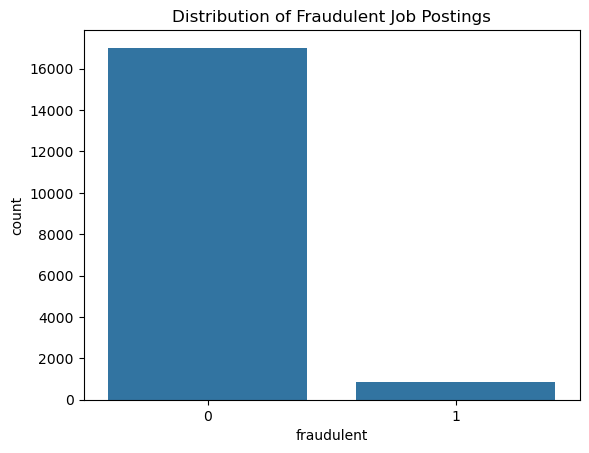

In [19]:
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent Job Postings')
plt.show()

### Insights  

- The dataset is **imbalanced** (17,014 legit, 866 fraud).  
- Balancing techniques like **SMOTE** may be needed.  
- A simple model may struggle with fraud detection. 

### Employment Type Distribution  


In [20]:
sns.countplot(data = df, x = 'employment_type')
plt.title('Distribution of Employment Type')

Text(0.5, 1.0, 'Distribution of Employment Type')

### Insights  

- **Full-time** jobs are the most common.  
- **Not specified** is the second highest, indicating missing or unclear data.  
- **Contract** jobs follow, suggesting a notable share of non-permanent roles.

In [21]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

### Required Experience vs Fraudulence 

In [22]:
plt.figure(figsize=(15 ,6))
sns.barplot(data = df, x = 'required_experience', y = 'fraudulent')

<Axes: xlabel='required_experience', ylabel='fraudulent'>

### Insights

- Fraudulent job postings occur across all experience levels.  
- No clear pattern suggests fraud is independent of experience requirements.  
- Further analysis may be needed to detect trends.  

### Fraudulent Postings by Required Education 

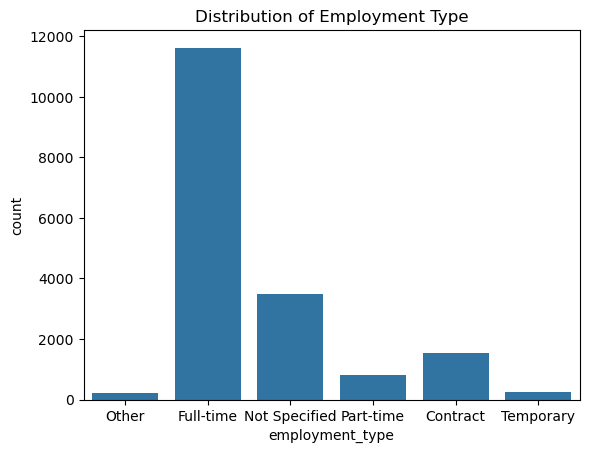

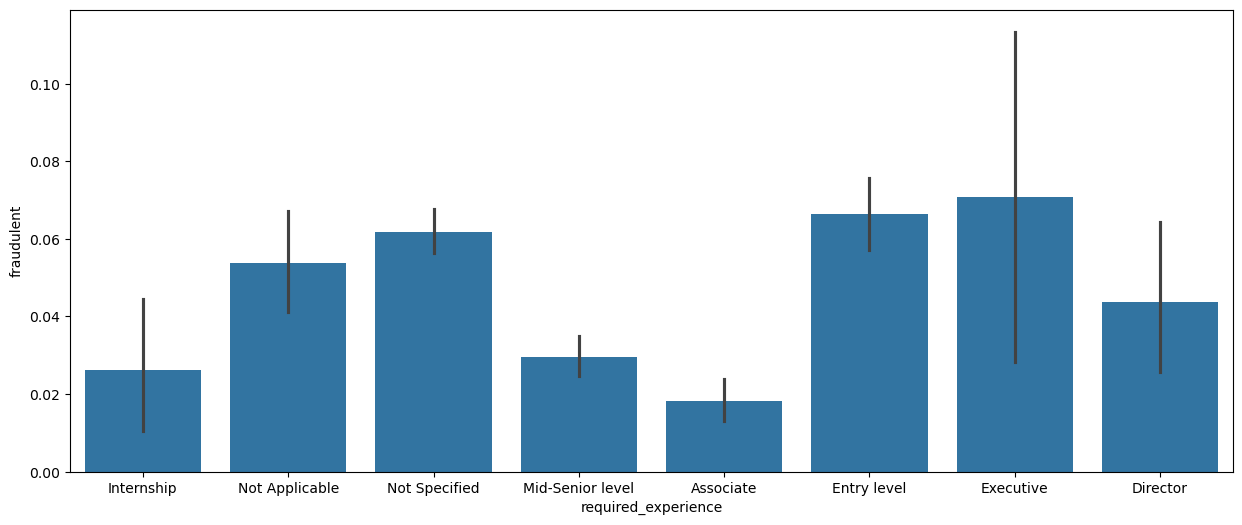

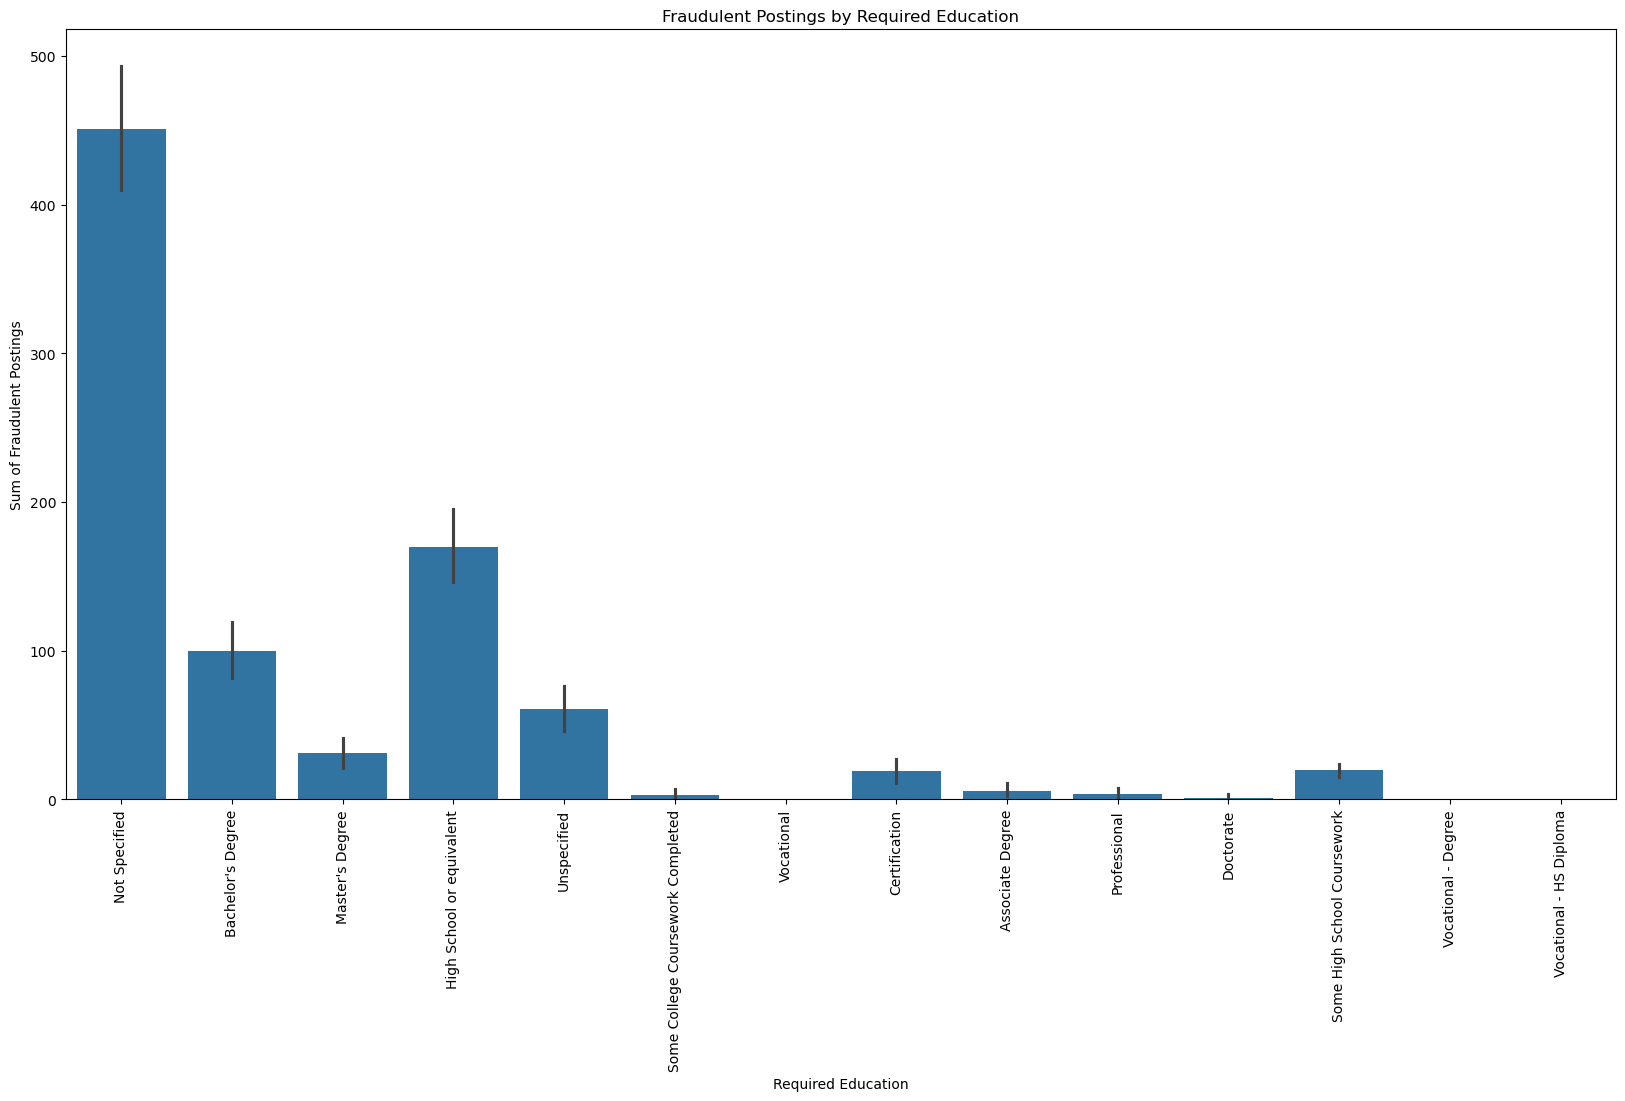

In [23]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='required_education', y='fraudulent', estimator=sum)
plt.title('Fraudulent Postings by Required Education')
plt.xlabel('Required Education')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation = 90)
plt.show()

### Insights

- **Most fraud cases** are in "Not Specified" jobs, suggesting vague postings may be suspicious.  
- **High School or Equivalent** ranks second, possibly targeting a broader audience.  
- **Bachelor’s Degree** follows, indicating fraud isn't limited to lower education levels.

In [24]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

### Fraudulent Postings by Job Function  

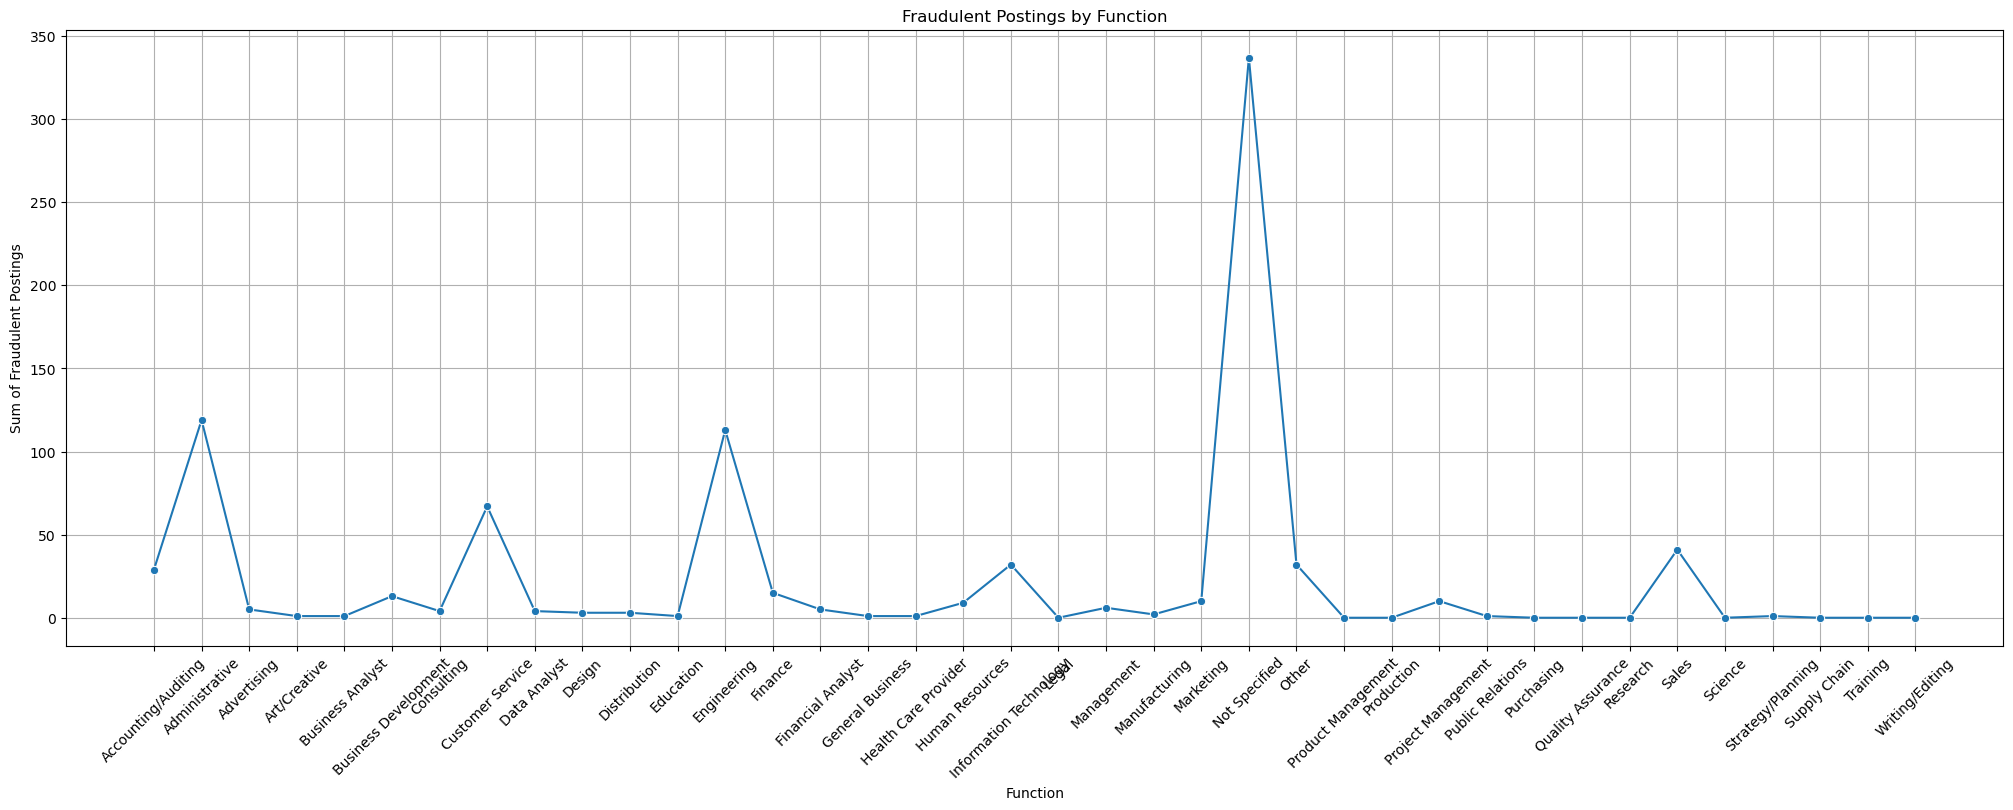

In [25]:
fraudulent_summary = df.groupby('function')['fraudulent'].sum().reset_index()

plt.figure(figsize=(25, 8))
sns.lineplot(data=fraudulent_summary, x='function', y='fraudulent', marker='o')
plt.title('Fraudulent Postings by Function')
plt.xlabel('Function')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.grid(True) 
plt.show()

### Insights

- **Marketing, Not Specified, and Other** functions show the highest fraud cases.  
- These roles often have vague descriptions, making them easy targets for scams.

### Top 5 Required Education Levels 

Text(0, 0.5, 'No. of Jobs')

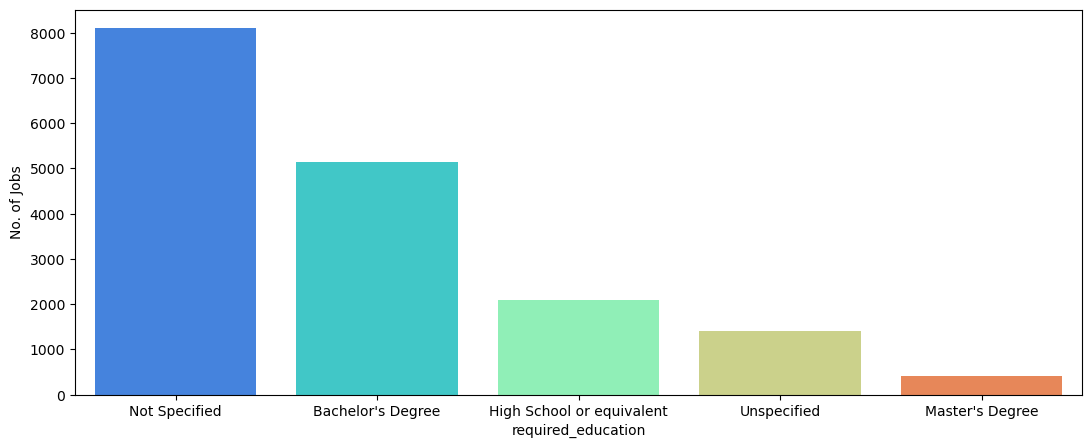

In [ ]:
plt.figure(figsize=(13,5))
country = df['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

### Insights

- **Unspecified education** is the most common, raising potential fraud concerns.  
- **Bachelor’s degree** and **High School or Equivalent** follow, indicating common job qualifications.  
- Vague education criteria can be a red flag in fraudulent job postings.  


## EDA Summary  

- **Fraudulent Job Distribution**: Fraudulent postings are significantly fewer than legitimate ones.  
- **Employment Type**: Full-time jobs dominate, followed by unspecified and contract roles.  
- **Required Experience**: Jobs with no specified experience show higher fraud cases.  
- **Education Level**: Most postings do not specify education, with high school and bachelor’s degrees being common.  
- **Job Function**: Marketing and unspecified roles have the highest fraud cases.  

Patterns indicate that vague job descriptions, unspecified requirements, and marketing roles may be potential fraud indicators.  
